In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import re


In [2]:
df = pd.read_csv("s3://capstonejain125/uconn_dataset.csv")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,11,13,14,15,16,33,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,SEVERITY,IMPACT,...,ASSIGNED_TO_SYS_ID,CAUSED_BY,RFC,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REOPENED_BY_SYS_ID,REOPENED_TIME,REASSIGNMENT_COUNT,U_OCC_ENGAGEMENT_METHOD
0,INC1319662,05/31/2021 10:12:19,05/31/2021 10:19:07,06/14/2021 11:0:10,Closed,NaN,False,3,3 - Low,3.0,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,INC1155199,04/29/2021 01:10:02,04/29/2021 01:13:07,05/13/2021 02:0:08,Closed,NaN,False,3,3 - Low,3.0,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2,INC0799260,02/01/2021 09:43:45,02/01/2021 09:52:07,02/15/2021 10:0:13,Closed,NaN,False,3,3 - Low,3.0,...,683a682a1b38a0103ec4c8092a4bcba2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN
3,INC0650904,12/13/2020 14:21:09,12/14/2020 12:34:26,12/28/2020 13:0:12,Closed,NaN,False,3,3 - Low,3.0,...,a42ab5fadbd44c90b47d54f9489619ed,NaN,NaN,INC0651688,0.0,0.0,NaN,NaN,0.0,NaN
4,INC1599254,07/11/2021 00:21:43,07/11/2021 02:56:16,07/25/2021 03:0:21,Closed,NaN,False,2,3 - Low,2.0,...,cce352f2db2714902bded487f496191f,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0,NaN


In [4]:
# shape
df.shape

(328240, 41)

In [5]:
# column names
df.columns

Index(['NUMBER', 'OPENED_AT', 'RESOLVED_AT', 'SYS_UPDATED_ON', 'STATE',
       'MAJOR_INCIDENT_STATE', 'ACTIVE', 'PRIORITY', 'SEVERITY', 'IMPACT',
       'U_SIM_ENGAGED', 'U_SIM_MANAGER_SYS_ID', 'LOCATION', 'PROMOTED_ON',
       'PROMOTED_BY_SYS_ID', 'PROPOSED_ON', 'PROPOSED_BY_SYS_ID',
       'CALLER_ID_SYS_ID', 'CONTACT_TYPE', 'U_INC_CAT', 'TAGS',
       'SHORT_DESCRIPTION', 'DESCRIPTION', 'U_TEMPLATE_USED', 'CLOSE_CODE',
       'U_RESOLUTION_CODE', 'U_TEAM_SPECIFIC_CODE', 'RESOLVED_BY_SYS_ID',
       'CMDB_CI', 'BUSINESS_SERVICE', 'ASSIGNMENT_GROUP', 'ASSIGNED_TO_SYS_ID',
       'CAUSED_BY', 'RFC', 'PARENT_INCIDENT', 'CHILD_INCIDENTS',
       'REOPEN_COUNT', 'REOPENED_BY_SYS_ID', 'REOPENED_TIME',
       'REASSIGNMENT_COUNT', 'U_OCC_ENGAGEMENT_METHOD'],
      dtype='object')

In [6]:
# data types
df.dtypes

NUMBER                      object
OPENED_AT                   object
RESOLVED_AT                 object
SYS_UPDATED_ON              object
STATE                       object
MAJOR_INCIDENT_STATE        object
ACTIVE                        bool
PRIORITY                    object
SEVERITY                    object
IMPACT                     float64
U_SIM_ENGAGED                 bool
U_SIM_MANAGER_SYS_ID        object
LOCATION                    object
PROMOTED_ON                 object
PROMOTED_BY_SYS_ID          object
PROPOSED_ON                 object
PROPOSED_BY_SYS_ID          object
CALLER_ID_SYS_ID            object
CONTACT_TYPE                object
U_INC_CAT                   object
TAGS                        object
SHORT_DESCRIPTION           object
DESCRIPTION                 object
U_TEMPLATE_USED             object
CLOSE_CODE                  object
U_RESOLUTION_CODE           object
U_TEAM_SPECIFIC_CODE        object
RESOLVED_BY_SYS_ID          object
CMDB_CI             

In [7]:
# try .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328240 entries, 0 to 328239
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NUMBER                   328240 non-null  object 
 1   OPENED_AT                328240 non-null  object 
 2   RESOLVED_AT              317139 non-null  object 
 3   SYS_UPDATED_ON           328240 non-null  object 
 4   STATE                    328240 non-null  object 
 5   MAJOR_INCIDENT_STATE     639 non-null     object 
 6   ACTIVE                   328240 non-null  bool   
 7   PRIORITY                 328197 non-null  object 
 8   SEVERITY                 328240 non-null  object 
 9   IMPACT                   328196 non-null  float64
 10  U_SIM_ENGAGED            328240 non-null  bool   
 11  U_SIM_MANAGER_SYS_ID     472 non-null     object 
 12  LOCATION                 206702 non-null  object 
 13  PROMOTED_ON              458 non-null     object 
 14  PROM

In [8]:
# missing values in entire dataframe
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum().sum()

5141406

In [9]:
# missing values by column
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum()

NUMBER                          0
OPENED_AT                       0
RESOLVED_AT                 11101
SYS_UPDATED_ON                  0
STATE                           0
MAJOR_INCIDENT_STATE       327601
ACTIVE                          0
PRIORITY                       43
SEVERITY                        0
IMPACT                         44
U_SIM_ENGAGED                   0
U_SIM_MANAGER_SYS_ID       327768
LOCATION                   121538
PROMOTED_ON                327782
PROMOTED_BY_SYS_ID         327782
PROPOSED_ON                327922
PROPOSED_BY_SYS_ID         327924
CALLER_ID_SYS_ID                0
CONTACT_TYPE                 2127
U_INC_CAT                      15
TAGS                       326483
SHORT_DESCRIPTION               0
DESCRIPTION                     4
U_TEMPLATE_USED            293639
CLOSE_CODE                 197647
U_RESOLUTION_CODE           10461
U_TEAM_SPECIFIC_CODE        22583
RESOLVED_BY_SYS_ID         121739
CMDB_CI                      7337
BUSINESS_SERVI

In [10]:
df.describe() # this are the four float variables

,IMPACT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT
count,328196.000000,328236.000000,328236.000000,328236.000000
mean,2.762959,0.164632,0.033741,0.396471
std,0.628549,4.686360,0.340311,0.816559
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,1.000000
max,4.000000,1144.000000,106.000000,24.000000


In [11]:
# ok now first drop the target leakage

df.drop(['U_SIM_ENGAGED','U_SIM_MANAGER_SYS_ID','PROMOTED_ON','PROMOTED_BY_SYS_ID','CLOSE_CODE','U_RESOLUTION_CODE'], axis =1 , inplace = True)

In [12]:
# ok now first drop the target leakage

df.drop(['U_TEAM_SPECIFIC_CODE','RESOLVED_BY_SYS_ID','RFC',], axis =1 , inplace = True)

In [13]:
df.columns

Index(['NUMBER', 'OPENED_AT', 'RESOLVED_AT', 'SYS_UPDATED_ON', 'STATE',
       'MAJOR_INCIDENT_STATE', 'ACTIVE', 'PRIORITY', 'SEVERITY', 'IMPACT',
       'LOCATION', 'PROPOSED_ON', 'PROPOSED_BY_SYS_ID', 'CALLER_ID_SYS_ID',
       'CONTACT_TYPE', 'U_INC_CAT', 'TAGS', 'SHORT_DESCRIPTION', 'DESCRIPTION',
       'U_TEMPLATE_USED', 'CMDB_CI', 'BUSINESS_SERVICE', 'ASSIGNMENT_GROUP',
       'ASSIGNED_TO_SYS_ID', 'CAUSED_BY', 'PARENT_INCIDENT', 'CHILD_INCIDENTS',
       'REOPEN_COUNT', 'REOPENED_BY_SYS_ID', 'REOPENED_TIME',
       'REASSIGNMENT_COUNT', 'U_OCC_ENGAGEMENT_METHOD'],
      dtype='object')

In [14]:
df.isnull().sum()

NUMBER                          0
OPENED_AT                       0
RESOLVED_AT                 11101
SYS_UPDATED_ON                  0
STATE                           0
MAJOR_INCIDENT_STATE       327601
ACTIVE                          0
PRIORITY                       43
SEVERITY                        0
IMPACT                         44
LOCATION                   121538
PROPOSED_ON                327922
PROPOSED_BY_SYS_ID         327924
CALLER_ID_SYS_ID                0
CONTACT_TYPE                 2127
U_INC_CAT                      15
TAGS                       326483
SHORT_DESCRIPTION               0
DESCRIPTION                     4
U_TEMPLATE_USED            293639
CMDB_CI                      7337
BUSINESS_SERVICE           155737
ASSIGNMENT_GROUP                4
ASSIGNED_TO_SYS_ID           1991
CAUSED_BY                  326280
PARENT_INCIDENT            274240
CHILD_INCIDENTS                 4
REOPEN_COUNT                    4
REOPENED_BY_SYS_ID         324924
REOPENED_TIME 

In [15]:
# removing the date fields as well because they are past values and does not add any predictive power to our model
df.drop(['NUMBER','OPENED_AT','SYS_UPDATED_ON','LOCATION','PROPOSED_ON','REOPENED_TIME'], axis = 1 , inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328240 entries, 0 to 328239
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RESOLVED_AT              317139 non-null  object 
 1   STATE                    328240 non-null  object 
 2   MAJOR_INCIDENT_STATE     639 non-null     object 
 3   ACTIVE                   328240 non-null  bool   
 4   PRIORITY                 328197 non-null  object 
 5   SEVERITY                 328240 non-null  object 
 6   IMPACT                   328196 non-null  float64
 7   PROPOSED_BY_SYS_ID       316 non-null     object 
 8   CALLER_ID_SYS_ID         328240 non-null  object 
 9   CONTACT_TYPE             326113 non-null  object 
 10  U_INC_CAT                328225 non-null  object 
 11  TAGS                     1757 non-null    object 
 12  SHORT_DESCRIPTION        328240 non-null  object 
 13  DESCRIPTION              328236 non-null  object 
 14  U_TE

In [17]:
df.drop(['RESOLVED_AT'], axis =1 , inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328240 entries, 0 to 328239
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STATE                    328240 non-null  object 
 1   MAJOR_INCIDENT_STATE     639 non-null     object 
 2   ACTIVE                   328240 non-null  bool   
 3   PRIORITY                 328197 non-null  object 
 4   SEVERITY                 328240 non-null  object 
 5   IMPACT                   328196 non-null  float64
 6   PROPOSED_BY_SYS_ID       316 non-null     object 
 7   CALLER_ID_SYS_ID         328240 non-null  object 
 8   CONTACT_TYPE             326113 non-null  object 
 9   U_INC_CAT                328225 non-null  object 
 10  TAGS                     1757 non-null    object 
 11  SHORT_DESCRIPTION        328240 non-null  object 
 12  DESCRIPTION              328236 non-null  object 
 13  U_TEMPLATE_USED          34601 non-null   object 
 14  CMDB

In [19]:
df['CONTACT_TYPE'].value_counts()

Alert                     176309
CA SOI                     75242
Self-service               25774
Phone                      15392
Automation                 12507
Email                       6731
ESHD                        5361
CA Spectrum                 4603
Chat                        1661
Walk-in                     1046
Operator                     556
Sitescope                    471
Manual Monitoring Tool       167
ESP                          102
NetView                      102
eBonding NYL                  41
Robot                         20
Oview/Omegamon                18
IMT                            6
nowMobile                      4
Name: CONTACT_TYPE, dtype: int64

In [20]:
print(df['DESCRIPTION'][0])
print(df['DESCRIPTION'][1])
print(df['DESCRIPTION'][2])
print(df['DESCRIPTION'][3])
print(df['DESCRIPTION'][4])

Device ciloracd2022 of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.
Device cvwiisxp00180. of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.
Device <DOMAIN_NAME> of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.
A Major alarm was generated in SOI at Event Time: 2020-12-13T13:35:38-05:00Device ciloracs2013 of type Host_systemEDGE is no longer responding to primary management requests (e.g

In [21]:
df['ASSIGNMENT_GROUP'].value_counts()

SystemsMgmtProducts                 53072
WindowsServerSupport                27531
PROD SVC DB Alerting - Oracle       24988
EOCC Event Management               17145
Linux                               16406
                                    ...  
Asia GISG Server Windows                1
CM GSS SYKES                            1
QANI Prod Support LII                   1
Deskside L2 Tier 2                      1
Application Platform Engineering        1
Name: ASSIGNMENT_GROUP, Length: 407, dtype: int64

In [22]:
df['ASSIGNMENT_GROUP'].unique()

array(['SystemsMgmtProducts', 'EOCC Event Management',
       'Global SAN LII Support', 'DBA - Oracle',
       'EOCC - Mainframe Event Management',
       'PROD SVC DB Alerting - Oracle', 'Global Linux L2 Support',
       'NAS LII Support', 'EOCC AutoOrch', 'Big Data', 'CNOC Data',
       'EOCC - Forensic Troubleshooting', 'INTL UK WEB Support',
       'Global DB Oracle L2 Support', 'Linux', 'InformationMgmtProd',
       'Middleware Ops - BV-WAS-Pega-Tomcat', 'Cloud CoE AWS Engineering',
       'WindowsServerSupport', 'C SYS ETL', 'X86 Platform Support',
       'INTL Antwerp IT Requests', 'Network Operations',
       'Data Network Support – Firewall', 'ServiceNow Administration',
       'ETSSecOps', 'ENE Proxy Services', 'INTL ISG Server and Storage',
       'CM Net Serv Data Engineering', 'INTL ISG Svc Desk China Support',
       'HealthSpring SAN and Linux', 'Online View Services',
       'Global Platform L2 Support', 'DBA - DB2 LUW',
       'Data Network Support – Load Bal', 'GSS HG

In [23]:
df['target'] = df.ASSIGNMENT_GROUP.astype('category').cat.codes

In [24]:
df.head()

,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,SEVERITY,IMPACT,PROPOSED_BY_SYS_ID,CALLER_ID_SYS_ID,CONTACT_TYPE,U_INC_CAT,...,ASSIGNMENT_GROUP,ASSIGNED_TO_SYS_ID,CAUSED_BY,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REOPENED_BY_SYS_ID,REASSIGNMENT_COUNT,U_OCC_ENGAGEMENT_METHOD,target
0,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,SystemsMgmtProducts,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389
1,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,SystemsMgmtProducts,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389
2,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,SystemsMgmtProducts,683a682a1b38a0103ec4c8092a4bcba2,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389
3,Closed,NaN,False,3,3 - Low,3.0,NaN,7f9664dc1b9d1014b0dcb8061a4bcb0b,CA SOI,Failure > Alert,...,SystemsMgmtProducts,a42ab5fadbd44c90b47d54f9489619ed,NaN,INC0651688,0.0,0.0,NaN,0.0,NaN,389
4,Closed,NaN,False,2,3 - Low,2.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,EOCC Event Management,cce352f2db2714902bded487f496191f,NaN,NaN,0.0,0.0,NaN,2.0,NaN,150


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328240 entries, 0 to 328239
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STATE                    328240 non-null  object 
 1   MAJOR_INCIDENT_STATE     639 non-null     object 
 2   ACTIVE                   328240 non-null  bool   
 3   PRIORITY                 328197 non-null  object 
 4   SEVERITY                 328240 non-null  object 
 5   IMPACT                   328196 non-null  float64
 6   PROPOSED_BY_SYS_ID       316 non-null     object 
 7   CALLER_ID_SYS_ID         328240 non-null  object 
 8   CONTACT_TYPE             326113 non-null  object 
 9   U_INC_CAT                328225 non-null  object 
 10  TAGS                     1757 non-null    object 
 11  SHORT_DESCRIPTION        328240 non-null  object 
 12  DESCRIPTION              328236 non-null  object 
 13  U_TEMPLATE_USED          34601 non-null   object 
 14  CMDB

In [26]:
# remove the null values from the description column
df = df.dropna(subset=['DESCRIPTION'])

In [27]:
df['num_words'] = df.DESCRIPTION.apply(lambda x : len(x.split()))

In [28]:
df.head(5)

,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,SEVERITY,IMPACT,PROPOSED_BY_SYS_ID,CALLER_ID_SYS_ID,CONTACT_TYPE,U_INC_CAT,...,ASSIGNED_TO_SYS_ID,CAUSED_BY,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REOPENED_BY_SYS_ID,REASSIGNMENT_COUNT,U_OCC_ENGAGEMENT_METHOD,target,num_words
0,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39
1,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39
2,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,683a682a1b38a0103ec4c8092a4bcba2,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39
3,Closed,NaN,False,3,3 - Low,3.0,NaN,7f9664dc1b9d1014b0dcb8061a4bcb0b,CA SOI,Failure > Alert,...,a42ab5fadbd44c90b47d54f9489619ed,NaN,INC0651688,0.0,0.0,NaN,0.0,NaN,389,102
4,Closed,NaN,False,2,3 - Low,2.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,cce352f2db2714902bded487f496191f,NaN,NaN,0.0,0.0,NaN,2.0,NaN,150,10


In [29]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [30]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [31]:
word_distribution.head()

,bins,counts
0,0-100,255907
1,100-300,71727
2,300-500,368
3,500-800,67
4,>800,115


Text(0.5, 1.0, 'Word distribution per bin')

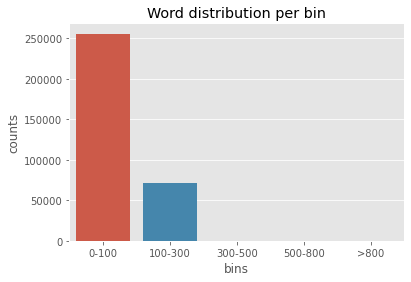

In [32]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [33]:
num_class = len(np.unique(df.target.values)) # for this multiclass classification we have 408 different category`
print(num_class)


408


In [34]:
df.head()

,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,SEVERITY,IMPACT,PROPOSED_BY_SYS_ID,CALLER_ID_SYS_ID,CONTACT_TYPE,U_INC_CAT,...,CAUSED_BY,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REOPENED_BY_SYS_ID,REASSIGNMENT_COUNT,U_OCC_ENGAGEMENT_METHOD,target,num_words,bins
0,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39,0-100
1,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39,0-100
2,Closed,NaN,False,3,3 - Low,3.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,389,39,0-100
3,Closed,NaN,False,3,3 - Low,3.0,NaN,7f9664dc1b9d1014b0dcb8061a4bcb0b,CA SOI,Failure > Alert,...,NaN,INC0651688,0.0,0.0,NaN,0.0,NaN,389,102,100-300
4,Closed,NaN,False,2,3 - Low,2.0,NaN,15350bc6db6d1494abcafb5aaf961940,Alert,Failure > Alert,...,NaN,NaN,0.0,0.0,NaN,2.0,NaN,150,10,0-100


In [35]:
df_new= df[['DESCRIPTION', 'ASSIGNMENT_GROUP','target', 'num_words','bins']].copy()

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328236 entries, 0 to 328239
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   DESCRIPTION       328236 non-null  object  
 1   ASSIGNMENT_GROUP  328232 non-null  object  
 2   target            328236 non-null  int16   
 3   num_words         328236 non-null  int64   
 4   bins              328184 non-null  category
dtypes: category(1), int16(1), int64(1), object(2)
memory usage: 11.0+ MB


In [37]:
df_new.head()

,DESCRIPTION,ASSIGNMENT_GROUP,target,num_words,bins
0,Device ciloracd2022 of type Host_systemEDGE is...,SystemsMgmtProducts,389,39,0-100
1,Device cvwiisxp00180. of type Host_systemEDGE ...,SystemsMgmtProducts,389,39,0-100
2,Device <DOMAIN_NAME> of type Host_systemEDGE i...,SystemsMgmtProducts,389,39,0-100
3,A Major alarm was generated in SOI at Event Ti...,SystemsMgmtProducts,389,102,100-300
4,Monitor Name:Specialty Script Gateway URL: htt...,EOCC Event Management,150,10,0-100


In [38]:
df_new.reset_index(inplace=True, drop=True)
df_new # much nicer now!

,DESCRIPTION,ASSIGNMENT_GROUP,target,num_words,bins
0,Device ciloracd2022 of type Host_systemEDGE is...,SystemsMgmtProducts,389,39,0-100
1,Device cvwiisxp00180. of type Host_systemEDGE ...,SystemsMgmtProducts,389,39,0-100
2,Device <DOMAIN_NAME> of type Host_systemEDGE i...,SystemsMgmtProducts,389,39,0-100
3,A Major alarm was generated in SOI at Event Ti...,SystemsMgmtProducts,389,102,100-300
4,Monitor Name:Specialty Script Gateway URL: htt...,EOCC Event Management,150,10,0-100
...,...,...,...,...,...
328231,/ almost full warning : Used disk space on / p...,EOCC Event Management,150,29,0-100
328232,A Major alarm was generated in SOI at Event Ti...,SystemsMgmtProducts,389,101,100-300
328233,Device QNJ1VBRP01.qualcare.local of type Host_...,SystemsMgmtProducts,389,39,0-100
328234,Please remove the attached account IDs from FI...,Online View Services,325,21,0-100


In [39]:
## Data preprocessing 

In [40]:
#removing all the html links 

"""
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x: re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", x))
"""

'\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x: re.sub(r"^https://t.co/[a-zA-Z0-9]*\\s", " ", x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\s+https://t.co/[a-zA-Z0-9]*\\s", " ", x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\s+https://t.co/[a-zA-Z0-9]*$", " ", x))\n'

In [41]:
# make everything lowercase
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].str.lower()
df_new.head()

,DESCRIPTION,ASSIGNMENT_GROUP,target,num_words,bins
0,device ciloracd2022 of type host_systemedge is...,SystemsMgmtProducts,389,39,0-100
1,device cvwiisxp00180. of type host_systemedge ...,SystemsMgmtProducts,389,39,0-100
2,device <domain_name> of type host_systemedge i...,SystemsMgmtProducts,389,39,0-100
3,a major alarm was generated in soi at event ti...,SystemsMgmtProducts,389,102,100-300
4,monitor name:specialty script gateway url: htt...,EOCC Event Management,150,10,0-100


In [42]:
"""
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"what's","what is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"where's","where is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"it's","it is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"who's","who is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"i'm","i am",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"she's","she is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"he's","he is",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"they're","they are",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"who're","who are",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"ain't","am not",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"wouldn't","would not",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"shouldn't","should not",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"can't","can not",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"couldn't","could not",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"won't","will not",x))
"""

'\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"what\'s","what is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"where\'s","where is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"it\'s","it is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"who\'s","who is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"i\'m","i am",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"she\'s","she is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"he\'s","he is",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"they\'re","they are",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"who\'re","who are",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"ain\'t","am not",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map

In [44]:
"""
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\W"," ",x)) #removing all the junk words
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\d"," ",x)) # removing all the single digit
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"['[^!.?]+']"," ",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\s+[a-z]\s+"," ",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\s+[a-z]$"," ",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"^[a-z]\s+"," ",x))
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].str.replace('_','')
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].map(lambda x:re.sub(r"\s+"," ",x))
"""

'\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\W"," ",x)) #removing all the junk words\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\d"," ",x)) # removing all the single digit\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"[\'[^!.?]+\']"," ",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\s+[a-z]\\s+"," ",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\s+[a-z]$"," ",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"^[a-z]\\s+"," ",x))\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].str.replace(\'_\',\'\')\ndf_new[\'DESCRIPTION\'] = df_new[\'DESCRIPTION\'].map(lambda x:re.sub(r"\\s+"," ",x))\n'

In [45]:
# here's an example of what we did
print(df_new['DESCRIPTION'][0])
print(df_new['DESCRIPTION'][1])
print(df_new['DESCRIPTION'][2])

device ciloracd     of type host_systemedge is no longer responding to primary management requests  e g  snmp   but appears to be responsive to other communication protocol  e g  icmp  this condition has persisted for an extended amount of time an alarm will be generated 
device cvwiisxp       of type host_systemedge is no longer responding to primary management requests  e g  snmp   but appears to be responsive to other communication protocol  e g  icmp  this condition has persisted for an extended amount of time an alarm will be generated 
device  domain_name  of type host_systemedge is no longer responding to primary management requests  e g  snmp   but appears to be responsive to other communication protocol  e g  icmp  this condition has persisted for an extended amount of time an alarm will be generated 


In [46]:
# remove any funky characters with a blank
# advanced code, but works!
#if anything is still left which needs to be cleaned
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_new.head()

,DESCRIPTION,ASSIGNMENT_GROUP,target,num_words,bins
0,device ciloracd of type host_systemedge is no ...,SystemsMgmtProducts,389,39,0-100
1,device cvwiisxp of type host_systemedge is no ...,SystemsMgmtProducts,389,39,0-100
2,device domain_name of type host_systemedge is ...,SystemsMgmtProducts,389,39,0-100
3,a major alarm was generated in soi at event ti...,SystemsMgmtProducts,389,102,100-300
4,monitor name specialty script gateway url http...,EOCC Event Management,150,10,0-100


In [47]:
# let's see what we did, no commas or periods!
print(df_new['DESCRIPTION'][0])
print(df_new['DESCRIPTION'][1])
print(df_new['DESCRIPTION'][2])
#data looks pretty much clean now

device ciloracd of type host_systemedge is no longer responding to primary management requests e g snmp but appears to be responsive to other communication protocol e g icmp this condition has persisted for an extended amount of time an alarm will be generated
device cvwiisxp of type host_systemedge is no longer responding to primary management requests e g snmp but appears to be responsive to other communication protocol e g icmp this condition has persisted for an extended amount of time an alarm will be generated
device domain_name of type host_systemedge is no longer responding to primary management requests e g snmp but appears to be responsive to other communication protocol e g icmp this condition has persisted for an extended amount of time an alarm will be generated


In [48]:
# let's remove some of the stop words (see what happens if you comment this cell out)
# we can do better!
# define some stop words
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
# remove the stop words
# apply these stopwords to the data
# link: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe/43407993

# this looks good! 
# ' '. adds a nice space (try adding a 'D' instead of ' ' and see what happens!)
df_new.head() # note how the stop words have been removed
df_new["DESCRIPTION"] = df_new['DESCRIPTION'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df_new.head()

,DESCRIPTION,ASSIGNMENT_GROUP,target,num_words,bins
0,device ciloracd type host_systemedge longer re...,SystemsMgmtProducts,389,39,0-100
1,device cvwiisxp type host_systemedge longer re...,SystemsMgmtProducts,389,39,0-100
2,device domain_name type host_systemedge longer...,SystemsMgmtProducts,389,39,0-100
3,major alarm generated soi event time device ci...,SystemsMgmtProducts,389,102,100-300
4,monitor name specialty script gateway url http...,EOCC Event Management,150,10,0-100


In [51]:
# 1) what are the most common words in the EVENT_NARRATIVE? note that we are doing this before tokenizer
# you can also turn this into a bar plot!
myTable = df_new['DESCRIPTION'].str.split(expand=True).stack().value_counts()
myTable[0:100] # too cool! 

MemoryError: Unable to allocate 8.88 GiB for an array with shape (328236, 3630) and data type object

In [52]:
!pip install wordcloud

OSError: [Errno 12] Cannot allocate memory

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(hail_df['EVENT_NARRATIVE']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(hail_df['EVENT_NARRATIVE']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [49]:
df_new['DESCRIPTION'] = df_new['DESCRIPTION'].astype(str)

In [50]:
type(df_new['DESCRIPTION'])

pandas.core.series.Series

In [51]:
data_description = df_new.DESCRIPTION.values

In [52]:
type(data_description)

numpy.ndarray

In [53]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)

tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

aaaafe 13.008344006860444
aaab 13.008344006860444
aaac 13.008344006860444
aaadadad 13.008344006860444
aaafae 13.008344006860444
aaah 13.008344006860444
aaaoper 13.008344006860444
aaaplease 13.008344006860444
aaba 13.008344006860444
aabba 13.008344006860444
aabca 13.008344006860444
aabccbaa 13.008344006860444
aabcfc 13.008344006860444
aabdcaff 13.008344006860444
aabddc 13.008344006860444
aabdnotifeventhost 13.008344006860444
aabdnotifeventoccurredtime 13.008344006860444
aabe 13.008344006860444
aabeeb 13.008344006860444
aabenotifeventhost 13.008344006860444
aabenotifeventoccurredtime 13.008344006860444
aable 13.008344006860444
aabyezjnwnwnaickyzgjcsru 13.008344006860444
aacc 13.008344006860444
aaccredoenrollments 13.008344006860444
aacf 13.008344006860444
aacfbc 13.008344006860444
aach 13.008344006860444
aadauthenticationfailedexception 13.008344006860444
aadbd 13.008344006860444
aadcdbb 13.008344006860444
aadding 13.008344006860444
aade 13.008344006860444
aadeb 13.008344006860444
aadef 

In [54]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [55]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['aaaafe' 'peghererror' 'pei' 'pej' 'pejbgetworkelementfields' 'pejd'
 'pelham' 'pellerin' 'pelligrini' 'pemcignaa']

Features with highest idf:
['fcef' 'fcekmk' 'fcemmsalertgroupname' 'fcenotifeventhost'
 'fcenotifeventoccurredtime' 'fcerner' 'fcetc' 'fcfb'
 'fccenotifeventoccurredtime' 'zzsegmentarchive']


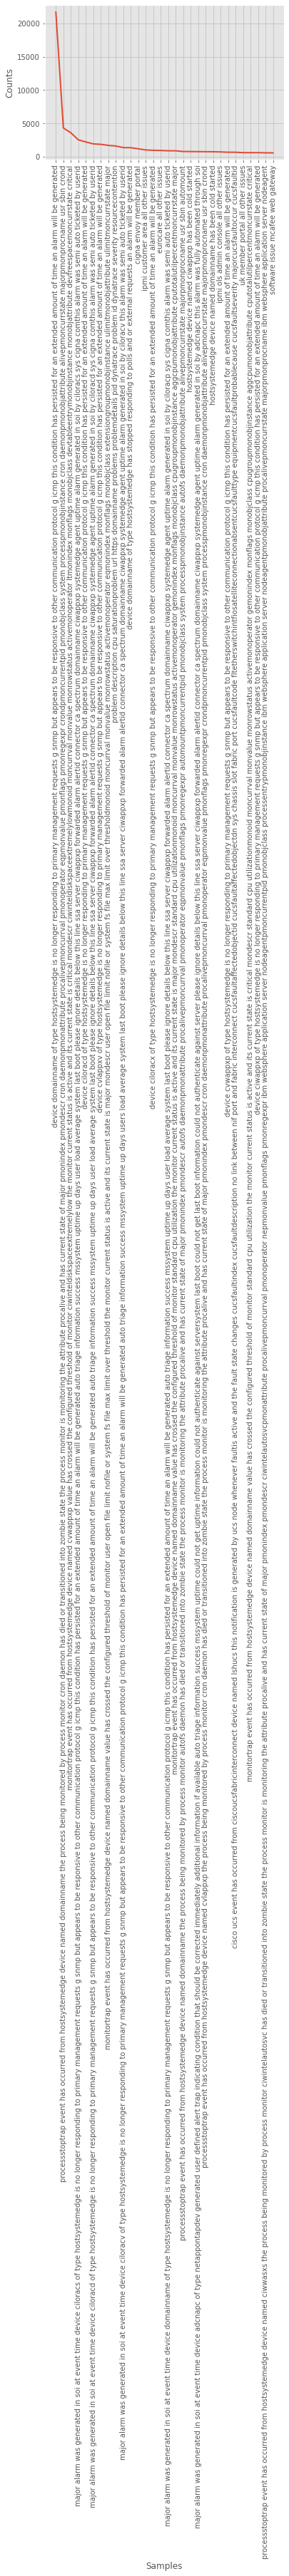

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
count = nltk.FreqDist(df_new.DESCRIPTION.values)
count.plot(30)

In [59]:
final_doc = df_new['DESCRIPTION']
all_documents = tuple(final_doc)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(328236, 90785)
  (0, 35440)	0.11106057205843027
  (0, 88096)	0.147959073800398
  (0, 2771)	0.11230318433895065
  (0, 81289)	0.10992950016359226
  (0, 3458)	0.16611157252603637
  (0, 30679)	0.16609323518254435
  (0, 3550)	0.28902955506046496
  (0, 33588)	0.11990082983362077
  (0, 61469)	0.16612532935115806
  (0, 38058)	0.08499414136477036
  (0, 17756)	0.16365202015754482
  (0, 80904)	0.10410740909834508
  (0, 40904)	0.16614023627289976
  (0, 65149)	0.16557532206569683
  (0, 17130)	0.1648126519534747
  (0, 59153)	0.15612394413611963
  (0, 69684)	0.1660073563225322
  (0, 7561)	0.2699351230507221
  (0, 4212)	0.162593990306048
  (0, 9684)	0.16128334684670484
  (0, 75036)	0.15234521411640464
  (0, 69113)	0.1536776180923089
  (0, 50484)	0.16238834205854585
  (0, 64163)	0.16440166095580513
  (0, 81876)	0.3312246798164677
  :	:
  (328235, 23245)	0.04072249647637589
  (328235, 41462)	0.04436583873581027
  (328235, 62623)	0.03751153728634788
  (328235, 8917)	0.09677490369327532
  (328235, 47480)

In [62]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 31.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 5.4 MB/s  eta 0:00:01


In [63]:
reindexed_data= df_new["DESCRIPTION"]

data_text = df_new[['DESCRIPTION']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

328236
                                         DESCRIPTION  index
0  device ciloracd of type hostsystemedge is no l...      0
1  device cvwiisxp of type hostsystemedge is no l...      1
2  device domainname of type hostsystemedge is no...      2
3  major alarm was generated in soi at event time...      3
4  monitor name specialty script gateway url http...      4


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [67]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['DESCRIPTION'].map(preprocess)
processed_docs[:5]

original document: 
['major', 'alarm', 'was', 'generated', 'in', 'soi', 'at', 'event', 'time', 'a', 'vwnewcaseevent', 'event', 'has', 'occurred', 'from', 'pingable', 'device', 'named', 'domainname', 'vwnewcaseevent', 'trap', 'signifies', 'that', 'the', 'sending', 'snmp', 'agent', 'has', 'detected', 'new', 'case', 'vwcaseid', 'vwcasename', 'port', 'utilizationvwcasedescription', 'port', 'utilization', 'for', 'adcpmax', 'vwcaseexceptiontype', 'port', 'utilizationvwcaseentity', 'adcpmax', 'vwcaseopentime', 'vwcasehostname', 'adcviapl', 'sys', 'cigna', 'comvwcaseseverity', 'cmfatalvwrulename', 'sl', 'daytime', 'storage', 'port', 'utilization', 'over', 'thresholdvwruledescription', 'alert', 'controlled', 'by', 'cronvwruleid', 'aakufx', 'bs', 'auto', 'triage', 'information', 'success', 'mssystem', 'uptime', 'could', 'not', 'get', 'uptime', 'information', 'could', 'not', 'authenticate', 'against', 'serversystem', 'last', 'boot', 'could', 'not', 'get', 'last', 'boot', 'information', 'could', '

0    [devic, ciloracd, type, hostsystemedg, longer,...
1    [devic, cvwiisxp, type, hostsystemedg, longer,...
2    [devic, domainnam, type, hostsystemedg, longer...
3    [major, alarm, gener, event, time, devic, cilo...
4    [monitor, specialti, script, gateway, http, do...
Name: DESCRIPTION, dtype: object

In [68]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 alarm
1 appear
2 ciloracd
3 commun
4 condit
5 devic
6 extend
7 gener
8 hostsystemedg
9 icmp
10 longer
